## **The Housing Market During the COVID-19 Pandemic**
**Exploratory Analysis**

In [ ]:
#Mounting data file from local Google Drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Converting the file from .tsv to .csv for ease of data analyis. 
#Tab Separated Values (TSV)and Comma Separated Values (CSV) are the two file type extensions used to load a set of data. A .tsv file will have tab separated values whereas .csv file has comma separated fields. 

import pandas as pd
tsv_file='/content/drive/My Drive/weekly_housing_market_data_most_recent.tsv'
housing_df = pd.read_table(tsv_file,sep='\t')
housing_df.to_csv('housing.csv',index=False)
housing_df.head()

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,average_homes_sold_yoy,total_homes_sold_with_price_drops,total_homes_sold_with_price_drops_yoy,average_homes_sold_with_price_drops,average_homes_sold_with_price_drops_yoy,percent_homes_sold_with_price_drops,percent_homes_sold_with_price_drops_yoy,median_sale_price,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy,pending_sales,pending_sales_yoy,median_pending_sqft,median_pending_sqft_yoy,off_market_in_two_weeks,off_market_in_two_weeks_yoy,percent_off_market_in_two_weeks,percent_off_market_in_two_weeks_yoy,total_new_listings,total_new_listings_yoy,average_new_listings,average_new_listings_yoy,median_new_listing_price,median_new_listing_price_yoy,median_new_listing_ppsf,median_new_listing_ppsf_yoy,inventory,inventory_yoy,total_active_listings,total_active_listings_yoy,active_listings,active_listings_yoy,age_of_inventory,age_of_inventory_yoy,homes_delisted,homes_delisted_yoy,percent_active_listings_delisted,percent_active_listings_delisted_yoy,median_active_list_price,median_active_list_price_yoy,median_active_list_ppsf,median_active_list_ppsf_yoy,average_of_median_list_price_amount,average_of_median_list_price_amount_yoy,average_of_median_offer_price_amount,average_of_median_offer_price_amount_yoy,avg_offer_to_list,avg_offer_to_list_yoy,average_sale_to_list_ratio,average_sale_to_list_ratio_yoy,median_days_on_market,median_days_on_market_yoy,pending_sales_to_sales_ratio,pending_sales_to_sales_ratio_yoy,months_of_supply,months_of_supply_yoy,average_pending_sales_listing_updates,average_pending_sales_listing_updates_yoy,percent_total_price_drops_of_inventory,percent_total_price_drops_of_inventory_yoy,last_updated
0,12860,-2,"Batavia, NY metro area",metro,2019-02-18,2019-02-24,1 weeks,4.0,-0.333333,4.0,-0.333333,2.0,-0.333333,2.0,-0.333333,0.500000,0.000000,92250.0,0.156740,62.322573,0.118871,67.0,26.0,3.0,0.000000,0.039474,0.013833,4.0,0.000000,1463.5,0.180242,2.0,0.0000,0.500000,0.000000,2.0,-0.750000,2.0,-0.750000,132400.0,-0.063649,103.287189,0.052871,70.0,-0.369369,76.0,-0.350427,76.0,-0.350427,76.5,-27.5,NaN,NaN,NaN,NaN,96200.0,-0.121060,68.865321,0.020452,NaN,NaN,NaN,NaN,NaN,NaN,0.922240,-0.030994,153.0,80.0,1.000000,0.333333,19.000000,-0.500000,6.0,0.000000,0.042857,0.015830,2020-09-09 14:54:09
1,28780,-2,"Kingsville, TX metro area",metro,2019-01-28,2019-02-03,1 weeks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.000000,5.0,4.000000,124900.0,-0.479366,90.826446,-0.343884,48.0,2.000000,50.0,1.777778,50.0,1.777778,80.5,-48.0,2.0,0.000000,0.040000,-0.071111,149250.0,0.144555,87.517739,0.111973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.500000,0.041667,NaN,2020-09-09 14:54:09
2,2180,5,"Delaware County, OH",county,2019-04-15,2019-04-21,1 weeks,73.0,0.140625,73.0,0.140625,11.0,-0.214286,11.0,-0.214286,0.150685,-0.068065,321000.0,-0.026978,137.622150,0.027494,0.0,0.0,38.0,-0.155556,0.037512,-0.012047,52.0,-0.018868,2248.0,0.103584,5.0,-0.6875,0.096154,-0.205733,78.0,-0.303571,78.0,-0.303571,362400.0,0.115077,137.751688,0.076403,944.0,0.121140,1013.0,0.115639,1013.0,0.115639,39.0,5.0,1.0,-0.750000,0.000987,-0.003418,399900.0,0.025648,136.951107,0.026997,292450.0,NaN,298750.0,NaN,1.021499,NaN,0.995570,0.000574,46.0,1.0,0.712329,-0.115796,13.876712,-0.310788,105.0,0.179775,0.040254,-0.013190,2020-09-09 14:54:09
3,2092,5,"Surry County, NC",county,2017-11-27,2017-12-03,1 weeks,7.0,-0.222222,7.0,-0.222222,3.0,0.500000,3.0,0.500000,0.428571,0.206349,144000.0,0.014085,73.770492,-0.127118,21.0,-19.0,5.0,-0.545455,0.019305,-0.023664,3.0,-0.500000,969.0,-0.490536,0.0,-1.0000,0.000000,-0.166667,9.0,-0.307692,9.0,-0.307692,126900.0,-0.124828,93.2

In [ ]:
#Installing libraries to support analysis and graphical visualization
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Sorting values first alphabetically by region_name and then in ascending order by period_begin
housing_df.sort_values(['region_name', 'period_begin'], ascending=[True, True], inplace=True)
housing_df.head()

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,average_homes_sold_yoy,total_homes_sold_with_price_drops,total_homes_sold_with_price_drops_yoy,average_homes_sold_with_price_drops,average_homes_sold_with_price_drops_yoy,percent_homes_sold_with_price_drops,percent_homes_sold_with_price_drops_yoy,median_sale_price,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy,pending_sales,pending_sales_yoy,median_pending_sqft,median_pending_sqft_yoy,off_market_in_two_weeks,off_market_in_two_weeks_yoy,percent_off_market_in_two_weeks,percent_off_market_in_two_weeks_yoy,total_new_listings,total_new_listings_yoy,average_new_listings,average_new_listings_yoy,median_new_listing_price,median_new_listing_price_yoy,median_new_listing_ppsf,median_new_listing_ppsf_yoy,inventory,inventory_yoy,total_active_listings,total_active_listings_yoy,active_listings,active_listings_yoy,age_of_inventory,age_of_inventory_yoy,homes_delisted,homes_delisted_yoy,percent_active_listings_delisted,percent_active_listings_delisted_yoy,median_active_list_price,median_active_list_price_yoy,median_active_list_ppsf,median_active_list_ppsf_yoy,average_of_median_list_price_amount,average_of_median_list_price_amount_yoy,average_of_median_offer_price_amount,average_of_median_offer_price_amount_yoy,avg_offer_to_list,avg_offer_to_list_yoy,average_sale_to_list_ratio,average_sale_to_list_ratio_yoy,median_days_on_market,median_days_on_market_yoy,pending_sales_to_sales_ratio,pending_sales_to_sales_ratio_yoy,months_of_supply,months_of_supply_yoy,average_pending_sales_listing_updates,average_pending_sales_listing_updates_yoy,percent_total_price_drops_of_inventory,percent_total_price_drops_of_inventory_yoy,last_updated
169986,10140,-2,"Aberdeen, WA metro area",metro,2017-01-02,2017-01-08,1 weeks,11.0,-0.352941,11.0,-0.352941,1.0,-0.833333,1.0,-0.833333,0.090909,-0.262032,139000.0,0.037313,73.839662,-0.131974,22.0,-22.0,14.0,-0.222222,0.033413,-0.006148,11.0,0.833333,1344.0,0.237569,6.0,5.00,0.545455,0.378788,23.0,-0.233333,23.0,-0.233333,163000.0,0.116821,133.779762,0.202603,398.0,-0.087156,419.0,-0.079121,419.0,-0.079121,124.0,10.0,7.0,1.333333,0.016706,0.010113,176000.0,0.075137,112.932692,0.015200,NaN,NaN,NaN,NaN,NaN,NaN,0.950474,0.028305,44.0,-25.0,1.000000,0.647059,38.090909,11.326203,21.0,0.235294,0.035176,-0.006109,2020-09-09 14:54:09
556913,10140,-2,"Aberdeen, WA metro area",metro,2017-01-02,2017-01-29,4 weeks,57.0,-0.287500,14.0,-0.300000,18.0,-0.454545,4.0,-0.500000,0.295136,-0.122557,178487.5,0.376953,104.222508,0.213926,45.8,3.3,15.0,-0.117647,0.035819,-0.002633,12.0,0.500000,1457.7,0.100483,5.0,1.50,0.462413,0.191579,106.0,0.039216,26.0,0.040000,161150.0,0.136760,115.112800,0.179264,392.0,-0.090487,1676.0,-0.079121,419.0,-0.079121,123.0,8.3,5.0,-0.166667,0.013127,-0.000062,177487.5,0.082901,115.389163,0.020914,NaN,NaN,NaN,NaN,NaN,NaN,0.973624,0.023271,81.7,5.7,0.910224,0.447076,30.134632,4.008844,28.0,0.272727,0.153061,-0.009352,2020-09-09 14:54:09
668951,10140,-2,"Aberdeen, WA metro area",metro,2017-01-02,2017-03-26,12 weeks,219.0,-0.017937,18.0,0.000000,73.0,-0.151163,6.0,-0.142857,0.324331,-0.075693,161804.1,0.185378,101.920738,0.170827,38.7,1.1,11.0,-0.214286,0.028618,-0.004171,12.0,0.090909,1499.7,0.044723,5.0,0.25,0.415301,0.060117,315.0,-0.051205,26.0,-0.037037,164005.0,0.122265,115.049247,0.135864,387.0,-0.100000,4955.0,-0.092158,412.0,-0.092511,112.4,8.7,3.0,-0.400000,0.009407,-0.001770,180141.6,0.106804,119.613556,0.057358,NaN,NaN,NaN,NaN,NaN,NaN,0.971107,0.018077,72.9,-20.7,0.742656,0.063869,23.936624,-3.034957,29.0,0.074074,0.366925,-0.049354,2020-09-09 14:54:09
115119,10140,-2,"Aberdeen, WA metro area",metro,2017-01-09,2017-01-15,1 weeks,17.0,-0.451613,17.0,-0.451613,8.0,-0.333333,8.0,-0.333333,0.470588,0.08

In [ ]:
# Checking the size of the dataset
housing_df.shape

(904608, 78)

In this case, the dataset has 904608 columns and 78 rows

In [ ]:
#To check the 78 rows of the dataset
list(housing_df)

['region_id',
 'region_type_id',
 'region_name',
 'region_type',
 'period_begin',
 'period_end',
 'duration',
 'total_homes_sold',
 'total_homes_sold_yoy',
 'average_homes_sold',
 'average_homes_sold_yoy',
 'total_homes_sold_with_price_drops',
 'total_homes_sold_with_price_drops_yoy',
 'average_homes_sold_with_price_drops',
 'average_homes_sold_with_price_drops_yoy',
 'percent_homes_sold_with_price_drops',
 'percent_homes_sold_with_price_drops_yoy',
 'median_sale_price',
 'median_sale_price_yoy',
 'median_sale_ppsf',
 'median_sale_ppsf_yoy',
 'median_days_to_close',
 'median_days_to_close_yoy',
 'price_drops',
 'price_drops_yoy',
 'percent_active_listings_with_price_drops',
 'percent_active_listings_with_price_drops_yoy',
 'pending_sales',
 'pending_sales_yoy',
 'median_pending_sqft',
 'median_pending_sqft_yoy',
 'off_market_in_two_weeks',
 'off_market_in_two_weeks_yoy',
 'percent_off_market_in_two_weeks',
 'percent_off_market_in_two_weeks_yoy',
 'total_new_listings',
 'total_new_listi

In [ ]:
#understanding the quality of the dataset - quantity of non-empty rows
def NaN_percent(housing_df, column_name):
    row_count = housing_df[column_name].shape[0]
    empty_values = row_count - housing_df[column_name].count()
    return (100.0*empty_values)/row_count
    
for i in list(housing_df):
    print(i +': ' + str(NaN_percent(housing_df,i))+'%')

region_id: 0.0%
region_type_id: 0.0%
region_name: 0.0%
region_type: 0.0%
period_begin: 0.0%
period_end: 0.0%
duration: 0.0%
total_homes_sold: 3.828288054052142%
total_homes_sold_yoy: 5.806382433053876%
average_homes_sold: 3.828288054052142%
average_homes_sold_yoy: 5.806382433053876%
total_homes_sold_with_price_drops: 3.828288054052142%
total_homes_sold_with_price_drops_yoy: 19.621316636598394%
average_homes_sold_with_price_drops: 3.828288054052142%
average_homes_sold_with_price_drops_yoy: 26.883025575718985%
percent_homes_sold_with_price_drops: 3.828288054052142%
percent_homes_sold_with_price_drops_yoy: 5.806382433053876%
median_sale_price: 3.828288054052142%
median_sale_price_yoy: 5.806382433053876%
median_sale_ppsf: 4.186454243163889%
median_sale_ppsf_yoy: 6.258954154727793%
median_days_to_close: 3.828288054052142%
median_days_to_close_yoy: 5.806382433053876%
price_drops: 11.030965899041353%
price_drops_yoy: 16.336910573419647%
percent_active_listings_with_price_drops: 11.03350843680

In [ ]:
#Alternative method to show null values
print(housing_df.isnull().sum().to_string())

region_id                                            0
region_type_id                                       0
region_name                                          0
region_type                                          0
period_begin                                         0
period_end                                           0
duration                                             0
total_homes_sold                                 34631
total_homes_sold_yoy                             52525
average_homes_sold                               34631
average_homes_sold_yoy                           52525
total_homes_sold_with_price_drops                34631
total_homes_sold_with_price_drops_yoy           177496
average_homes_sold_with_price_drops              34631
average_homes_sold_with_price_drops_yoy         243186
percent_homes_sold_with_price_drops              34631
percent_homes_sold_with_price_drops_yoy          52525
median_sale_price                                34631
median_sal

In [ ]:
#Selecting columns that are relevant to the research
df1 = housing_df[['region_name', 'period_begin', 'period_end', 'duration', 'total_homes_sold', 'average_homes_sold', 'inventory', 'homes_delisted', 'median_sale_price']]
df1.head()

,region_name,period_begin,period_end,duration,total_homes_sold,average_homes_sold,inventory,homes_delisted,median_sale_price
0,"Batavia, NY metro area",2019-02-18,2019-02-24,1 weeks,4.0,4.0,70.0,NaN,92250.0
1,"Kingsville, TX metro area",2019-01-28,2019-02-03,1 weeks,NaN,NaN,48.0,2.0,NaN
2,"Delaware County, OH",2019-04-15,2019-04-21,1 weeks,73.0,73.0,944.0,1.0,321000.0
3,"Surry County, NC",2017-11-27,2017-12-03,1 weeks,7.0,7.0,249.0,5.0,144000.0
4,"Manchester, NH metro area",2019-12-23,2019-12-29,1 weeks,67.0,67.0,909.0,16.0,289933.0


In [ ]:
#Drop the rows where at least one element is missing:
df1.dropna(inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Checking whether there is an adequate number of rows divided per time period to scale down to 1 weeks.
print(df1['duration'].value_counts())

12 weeks    263676
4 weeks     258571
1 weeks     216586
Name: duration, dtype: int64


In [ ]:
#Selecting data that shows a period of 1 weeks for analysis
 = df1.loc[housing_df["duration"] == "1 weeks"]
df2.head()

,region_name,period_begin,period_end,duration,total_homes_sold,average_homes_sold,inventory,homes_delisted
169986,"Aberdeen, WA metro area",2017-01-02,2017-01-08,1 weeks,11.0,11.0,398.0,7.0
115119,"Aberdeen, WA metro area",2017-01-09,2017-01-15,1 weeks,17.0,17.0,398.0,5.0
235675,"Aberdeen, WA metro area",2017-01-16,2017-01-22,1 weeks,14.0,14.0,387.0,6.0
170147,"Aberdeen, WA metro area",2017-01-23,2017-01-29,1 weeks,15.0,15.0,388.0,4.0
115035,"Aberdeen, WA metro area",2017-01-30,2017-02-05,1 weeks,23.0,23.0,399.0,1.0


In [ ]:
#Adding a column that narrows down the period to YYYY-MM (year and month). This will make visualization easier to read.
df2['Year'] = df2.period_begin.apply(lambda x: x[0:7])
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region_name,period_begin,period_end,duration,total_homes_sold,average_homes_sold,inventory,homes_delisted,Year
169986,"Aberdeen, WA metro area",2017-01-02,2017-01-08,1 weeks,11.0,11.0,398.0,7.0,2017-01
115119,"Aberdeen, WA metro area",2017-01-09,2017-01-15,1 weeks,17.0,17.0,398.0,5.0,2017-01
235675,"Aberdeen, WA metro area",2017-01-16,2017-01-22,1 weeks,14.0,14.0,387.0,6.0,2017-01
170147,"Aberdeen, WA metro area",2017-01-23,2017-01-29,1 weeks,15.0,15.0,388.0,4.0,2017-01
115035,"Aberdeen, WA metro area",2017-01-30,2017-02-05,1 weeks,23.0,23.0,399.0,1.0,2017-01


In [ ]:
#Sorting the dataset, first alphabetically by region_name and then oldest-to-newest for period_begin
df2.sort_values(['region_name', 'period_begin'], ascending=[True, True], inplace=True)
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region_name,period_begin,period_end,duration,total_homes_sold,average_homes_sold,inventory,homes_delisted,Year
169986,"Aberdeen, WA metro area",2017-01-02,2017-01-08,1 weeks,11.0,11.0,398.0,7.0,2017-01
115119,"Aberdeen, WA metro area",2017-01-09,2017-01-15,1 weeks,17.0,17.0,398.0,5.0,2017-01
235675,"Aberdeen, WA metro area",2017-01-16,2017-01-22,1 weeks,14.0,14.0,387.0,6.0,2017-01
170147,"Aberdeen, WA metro area",2017-01-23,2017-01-29,1 weeks,15.0,15.0,388.0,4.0,2017-01
115035,"Aberdeen, WA metro area",2017-01-30,2017-02-05,1 weeks,23.0,23.0,399.0,1.0,2017-01


In [ ]:
#Creating a pivot table to sum the total homes sold for all counties, with an index of period_begin
counties_by_total = df2.pivot_table(index='period_begin', columns='region_name', values='total_homes_sold', aggfunc='sum')

#Adding a column at the end showing the sum of total homes sold for all given counties, since the analysis shows the impact at a aggregate level for all counties. 
counties_by_total['sum'] = counties_by_total.sum(numeric_only=True, axis=1)
counties_by_total.head()

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Willmar, MN metro area","Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO"
period_begin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-02,11.0,14.0,NaN,78.0,NaN,1.0,9.0,7.0,3.0,14.0,6.0,80.0,147.0,40.0,115.0,28.0,6.0,3.0,NaN,NaN,NaN,27.0,NaN,34243.0,10.0,3.0,4.0,162.0,83.0,NaN,NaN,5.0,390.0,43.0,63.0,4.0,22.0,11.0,NaN,8.0,...,5.0,81.0,NaN,38.0,5.0,17.0,22.0,6.0,11.0,24.0,18.0,NaN,NaN,NaN,94.0,3.0,NaN,3.0,3.0,NaN,8.0,109.0,23.0,131.0,NaN,28.0,15.0,5.0,NaN,21.0,5.0,NaN,28.0,43.0,42.0,7.0,42.0,NaN,48.0,NaN
2017-01-09,17.0,31.0,NaN,127.0,NaN,NaN,18.0,4.0,3.0,22.0,3.0,111.0,178.0,59.0,161.0,39.0,6.0,6.0,NaN,NaN,5.0,29.0,NaN,45193.0,16.0,11.0,4.0,202.0,117.0,NaN,8.0,9.0,446.0,57.0,84.0,6.0,34.0,NaN,NaN,18.0,...,4.0,104.0,3.0,30.0,6.0,32.0,28.0,9.0,12.0,26.0,25.0,NaN,NaN,NaN,124.0,11.0,NaN,11.0,7.0,NaN,12.0,163.0,27.0,191.0,NaN,24.0,24.0,4.0,NaN,23.0,2.0,NaN,25.0,51.0,81.0,4.0,81.0,NaN,63.0,NaN
2017-01-16,14.0,27.0,NaN,110.0,NaN,2.0,13.0,6.0,6.0,21.0,2.0,113.0,162.0,46.0,133.0,30.0,10.0,3.0,NaN,NaN,NaN,29.0,NaN,42580.0,19.0,9.0,3.0,175.0,107.0,NaN,12.0,4.0,410.0,46.0,68.0,NaN,26.0,NaN,NaN,12.0,...,6.0,113.0,5.0,28.0,6.0,18.0,24.0,9.0,12.0,24.0,26.0,NaN,NaN,NaN,111.0,13.0,NaN,13.0,2.0,NaN,NaN,127.0,19.0,151.0,NaN,29.0,21.0,4.0,NaN,21.0,3.0,NaN,24.0,51.0,70.0,6.0,70.0,1.0,61.0,NaN
2017-01-23,15.0,30.0,NaN,142.0,NaN,NaN,15.0,7.0,5.0,20.0,NaN,131.0,169.0,49.0,134.0,33.0,10.0,NaN,NaN,NaN,NaN,35.0,NaN,47052.0,21.0,7.0,5.0,190.0,161.0,NaN,NaN,4.0,434.0,56.0,82.0,4.0,26.0,NaN,NaN,16.0,...,5.0,152.0,3.0,51.0,NaN,31.0,29.0,13.0,10.0,25.0,18.0,NaN,8.0,8.0,127.0,6.0,NaN,6.0,NaN,NaN,NaN,136.0,26.0,165.0,NaN,25.0,15.0,NaN,NaN,25.0,5.0,NaN,36.0,37.0,91.0,13.0,91.0,NaN,78.0,NaN
2017-01-30,23.0,44.0,NaN,141.0,NaN,1.0,20.0,4.0,7.0,21.0,5.0,143.0,141.0,48.0,183.0,38.0,9.0,5.0,NaN,NaN,4.0,33.0,NaN,54482.0,21.0,15.0,6.0,207.0,147.0,NaN,6.0,2.0,485.0,66.0,92.0,6.0,41.0,NaN,NaN,14.0,...,9.0,152.0,9.0,48.0,7.0,32.0,27.0,11.0,9.0,28.0,26.0,NaN,NaN,NaN,137.0,18.0,NaN,18.0,7.0,NaN,17.0,150.0,28.0,177.0,NaN,31.0,26.0,6.0,3.0,25.0,8.0,NaN,27.0,56.0,101.0,15.0,101.0,5.0,81.0,NaN


Text(0.5, 0, 'Time Period')

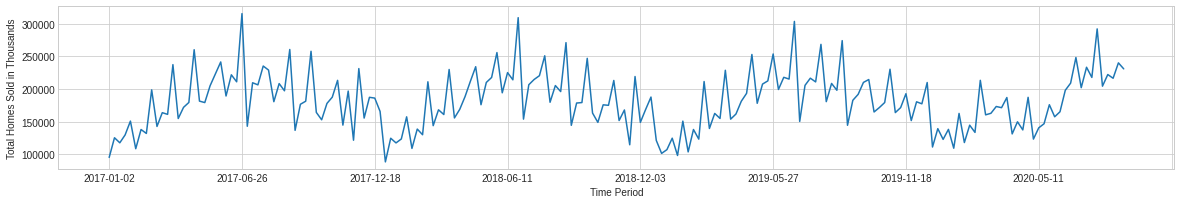

In [ ]:
#Using matplotlib to visualize the graph for total homes sold for all regions over the 2017-2020 time period
counties_by_total['sum'].plot(figsize=(20,3))
plt.ylabel('Total Homes Sold in Thousands')
plt.xlabel('Time Period')

In [ ]:
#Creating a pivot table to sum the the number of homes available on the market(inventory) for all counties, with an index of period_begin
counties_by_inventory = df2.pivot_table(index='period_begin', columns='region_name', values='inventory', aggfunc='sum')

#Adding a column at the end showing the sum of inventory for all given counties
counties_by_inventory['sum'] = counties_by_inventory.sum(numeric_only=True, axis=1)
counties_by_inventory.head()

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO",sum
period_begin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-02,398.0,597.0,NaN,688.0,NaN,89.0,478.0,249.0,185.0,354.0,140.0,2557.0,925.0,851.0,3239.0,381.0,300.0,108.0,NaN,NaN,NaN,348.0,NaN,854758.0,371.0,397.0,184.0,5293.0,2781.0,NaN,NaN,155.0,6072.0,1276.0,2005.0,91.0,868.0,311.0,NaN,360.0,...,3140.0,NaN,699.0,62.0,553.0,461.0,581.0,744.0,560.0,609.0,NaN,NaN,NaN,2602.0,290.0,NaN,290.0,84.0,NaN,235.0,2030.0,1117.0,2491.0,NaN,406.0,441.0,107.0,NaN,269.0,221.0,NaN,224.0,975.0,1865.0,259.0,1865.0,NaN,1756.0,NaN,2365409.0
2017-01-09,398.0,618.0,NaN,669.0,NaN,NaN,477.0,252.0,182.0,346.0,139.0,2520.0,985.0,851.0,3231.0,386.0,305.0,106.0,NaN,NaN,120.0,352.0,NaN,857079.0,364.0,389.0,181.0,5248.0,2752.0,NaN,110.0,154.0,6144.0,1278.0,2009.0,91.0,871.0,NaN,NaN,367.0,...,3127.0,147.0,724.0,62.0,557.0,456.0,585.0,741.0,538.0,603.0,NaN,NaN,NaN,2586.0,290.0,NaN,290.0,86.0,NaN,236.0,2032.0,1120.0,2488.0,NaN,402.0,451.0,108.0,NaN,250.0,222.0,NaN,226.0,954.0,1849.0,261.0,1849.0,NaN,1782.0,NaN,2374775.0
2017-01-16,387.0,618.0,NaN,647.0,NaN,80.0,478.0,255.0,178.0,352.0,138.0,2536.0,1013.0,824.0,3184.0,374.0,299.0,105.0,NaN,NaN,NaN,335.0,NaN,860112.0,362.0,386.0,175.0,5281.0,2733.0,NaN,109.0,154.0,6277.0,1302.0,2030.0,NaN,866.0,NaN,NaN,362.0,...,3131.0,146.0,741.0,57.0,556.0,451.0,579.0,740.0,537.0,604.0,NaN,NaN,NaN,2605.0,279.0,NaN,279.0,85.0,NaN,NaN,2017.0,1140.0,2468.0,NaN,399.0,462.0,105.0,NaN,241.0,219.0,NaN,222.0,949.0,1847.0,252.0,1847.0,82.0,1777.0,NaN,2376837.0
2017-01-23,388.0,636.0,NaN,633.0,NaN,NaN,487.0,257.0,180.0,352.0,NaN,2525.0,1039.0,828.0,3143.0,360.0,305.0,NaN,NaN,NaN,NaN,337.0,NaN,861864.0,348.0,379.0,179.0,5295.0,2717.0,NaN,NaN,150.0,6364.0,1323.0,2054.0,88.0,890.0,NaN,NaN,356.0,...,3113.0,155.0,736.0,NaN,551.0,457.0,577.0,733.0,533.0,608.0,NaN,134.0,134.0,2639.0,278.0,NaN,278.0,NaN,NaN,NaN,1969.0,1167.0,2426.0,NaN,403.0,456.0,NaN,NaN,234.0,212.0,NaN,216.0,928.0,1846.0,274.0,1846.0,NaN,1744.0,NaN,2379140.0
2017-01-30,399.0,622.0,NaN,620.0,NaN,84.0,466.0,257.0,178.0,360.0,146.0,2525.0,1046.0,814.0,3083.0,350.0,302.0,102.0,NaN,NaN,111.0,334.0,NaN,863970.0,357.0,382.0,173.0,5328.0,2732.0,NaN,108.0,157.0,646

Text(0.5, 0, 'Time Period')

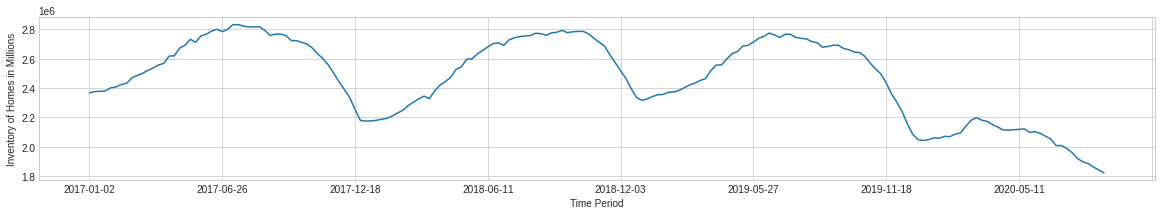

In [ ]:
#Using matplotlib to visualize the graph for the number of homes available on the market(inventory) for all regions over the 2017-2020 time period
counties_by_inventory['sum'].plot(figsize=(20,3))
plt.ylabel('Inventory of Homes in Millions')
plt.xlabel('Time Period')

In [ ]:
#Creating a pivot table to sum the the number of homes delisted for all counties, with an index of period_begin
counties_homesdelisted = df2.pivot_table(index='period_begin', columns='region_name', values='homes_delisted', aggfunc='sum')

#Adding a column at the end showing the sum of delisted for all given counties
counties_homesdelisted['sum'] = counties_homesdelisted.sum(numeric_only=True, axis=1)
counties_homesdelisted.head()

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO",sum
period_begin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-02,7.0,8.0,NaN,8.0,NaN,2.0,3.0,4.0,6.0,11.0,4.0,41.0,23.0,11.0,51.0,4.0,11.0,1.0,NaN,NaN,NaN,5.0,NaN,12483.0,14.0,7.0,1.0,27.0,53.0,NaN,NaN,1.0,99.0,14.0,21.0,1.0,12.0,1.0,NaN,10.0,...,73.0,NaN,10.0,2.0,12.0,27.0,9.0,24.0,10.0,6.0,NaN,NaN,NaN,80.0,8.0,NaN,8.0,4.0,NaN,3.0,35.0,12.0,62.0,NaN,7.0,7.0,1.0,NaN,3.0,21.0,NaN,2.0,37.0,9.0,3.0,9.0,NaN,17.0,NaN,37027.0
2017-01-09,5.0,5.0,NaN,11.0,NaN,NaN,4.0,2.0,1.0,5.0,2.0,61.0,25.0,10.0,38.0,4.0,2.0,2.0,NaN,NaN,1.0,6.0,NaN,10715.0,8.0,7.0,1.0,39.0,49.0,NaN,1.0,3.0,77.0,17.0,29.0,2.0,20.0,NaN,NaN,2.0,...,47.0,3.0,7.0,2.0,5.0,7.0,5.0,6.0,32.0,15.0,NaN,NaN,NaN,19.0,1.0,NaN,1.0,2.0,NaN,2.0,40.0,8.0,47.0,NaN,6.0,3.0,2.0,NaN,4.0,2.0,NaN,7.0,12.0,8.0,4.0,8.0,NaN,16.0,NaN,31746.0
2017-01-16,6.0,14.0,NaN,6.0,NaN,2.0,3.0,1.0,3.0,3.0,2.0,32.0,23.0,11.0,47.0,2.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,9958.0,5.0,3.0,4.0,26.0,49.0,NaN,2.0,1.0,66.0,12.0,20.0,NaN,7.0,NaN,NaN,4.0,...,21.0,2.0,18.0,2.0,7.0,7.0,4.0,5.0,14.0,7.0,NaN,NaN,NaN,30.0,2.0,NaN,2.0,1.0,NaN,NaN,44.0,4.0,51.0,NaN,4.0,5.0,2.0,NaN,1.0,1.0,NaN,4.0,14.0,18.0,6.0,18.0,1.0,18.0,NaN,29536.0
2017-01-23,4.0,6.0,NaN,4.0,NaN,NaN,2.0,3.0,2.0,3.0,NaN,33.0,21.0,9.0,47.0,1.0,1.0,NaN,NaN,NaN,NaN,3.0,NaN,9831.0,3.0,4.0,2.0,32.0,47.0,NaN,NaN,1.0,82.0,9.0,13.0,1.0,11.0,NaN,NaN,13.0,...,30.0,2.0,3.0,NaN,2.0,2.0,3.0,4.0,9.0,4.0,NaN,1.0,1.0,19.0,3.0,NaN,3.0,NaN,NaN,NaN,44.0,6.0,46.0,NaN,7.0,4.0,NaN,NaN,3.0,4.0,NaN,7.0,16.0,17.0,3.0,17.0,NaN,23.0,NaN,29096.0
2017-01-30,1.0,13.0,NaN,7.0,NaN,1.0,6.0,3.0,4.0,7.0,1.0,40.0,24.0,22.0,67.0,2.0,9.0,2.0,NaN,NaN,1.0,6.0,NaN,12757.0,3.0,6.0,2.0,39.0,37.0,NaN,1.0,1.0,104.0,19.0,26.0,1.0,12.0,NaN,NaN,8.0,...,50.0,7.0,13.0,1.0,12.0,10.0,4.0,12.0,20.0,11.0,NaN,NaN,NaN,39.0,1.0,NaN,1.0,3.0,NaN,8.0,44.0,10.0,54.0,NaN,3.0,2.0,2.0,2.0,1.0,3.0,NaN,4.0,18.0,43.0,1.0,43.0,2.0,27.0,NaN,37845.0


Text(0.5, 0, 'Time Period')

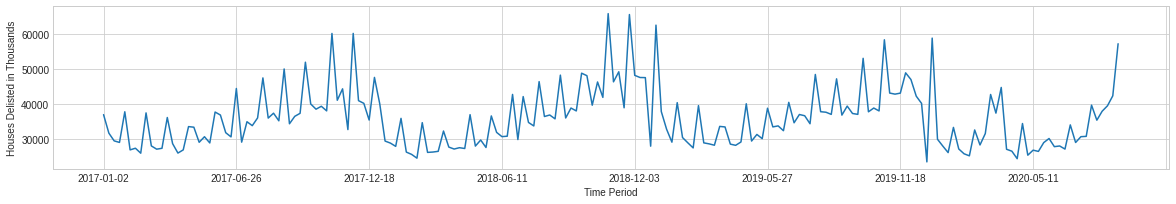

In [ ]:
#Using matplotlib to visualize the graph for number of homes delisted regions over the 2017-2020 time period
counties_homesdelisted['sum'].plot(figsize=(20,3))
plt.ylabel('Homes Delisted in Thousands')
plt.xlabel('Time Period')

In [ ]:
#Creating a pivot table to sum the total homes sold for all counties, with an index of period_begin by YYYY-MM
total_year = df2.pivot_table(index='Year', columns='region_name', values='total_homes_sold', aggfunc='sum')

#Adding a column at the end showing the sum of total homes sold for all given counties
total_year['sum'] = total_year.sum(numeric_only=True, axis=1)
total_year.head()

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO",sum
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01,80.0,146.0,NaN,598.0,NaN,4.0,75.0,28.0,24.0,98.0,16.0,578.0,797.0,242.0,726.0,168.0,41.0,17.0,NaN,NaN,9.0,153.0,NaN,223550.0,87.0,45.0,22.0,936.0,615.0,NaN,26.0,24.0,2165.0,268.0,389.0,20.0,149.0,11.0,NaN,68.0,...,602.0,20.0,195.0,24.0,130.0,130.0,48.0,54.0,127.0,113.0,NaN,8.0,8.0,593.0,51.0,NaN,51.0,19.0,NaN,37.0,685.0,123.0,815.0,NaN,137.0,101.0,19.0,3.0,115.0,23.0,NaN,140.0,238.0,385.0,45.0,385.0,6.0,331.0,NaN,618215.0
2017-02,67.0,153.0,NaN,497.0,NaN,7.0,72.0,19.0,10.0,76.0,9.0,547.0,765.0,170.0,515.0,104.0,48.0,22.0,NaN,NaN,13.0,170.0,NaN,210808.0,68.0,30.0,21.0,798.0,557.0,NaN,33.0,19.0,1982.0,201.0,306.0,17.0,161.0,51.0,NaN,50.0,...,543.0,21.0,191.0,NaN,123.0,101.0,39.0,62.0,142.0,96.0,NaN,24.0,24.0,523.0,42.0,NaN,42.0,9.0,NaN,60.0,566.0,131.0,667.0,NaN,93.0,121.0,14.0,4.0,112.0,4.0,2.0,112.0,165.0,390.0,35.0,390.0,3.0,287.0,NaN,576795.0
2017-03,84.0,187.0,NaN,644.0,NaN,10.0,106.0,20.0,21.0,68.0,4.0,661.0,1040.0,196.0,658.0,134.0,55.0,20.0,NaN,NaN,2.0,202.0,1.0,257810.0,98.0,20.0,17.0,1095.0,721.0,NaN,50.0,26.0,2516.0,261.0,381.0,22.0,204.0,20.0,NaN,71.0,...,706.0,34.0,252.0,11.0,120.0,99.0,44.0,70.0,142.0,157.0,NaN,34.0,34.0,668.0,62.0,NaN,62.0,27.0,NaN,44.0,583.0,192.0,682.0,NaN,183.0,139.0,6.0,8.0,134.0,16.0,7.0,126.0,236.0,498.0,53.0,498.0,4.0,385.0,NaN,704681.0
2017-04,90.0,195.0,NaN,717.0,NaN,3.0,100.0,34.0,1.0,86.0,13.0,758.0,1122.0,221.0,714.0,132.0,23.0,19.0,NaN,NaN,6.0,258.0,NaN,279942.0,119.0,67.0,20.0,1232.0,810.0,NaN,23.0,21.0,2682.0,307.0,454.0,20.0,227.0,19.0,NaN,88.0,...,797.0,42.0,269.0,19.0,209.0,123.0,43.0,77.0,177.0,194.0,NaN,35.0,35.0,767.0,51.0,NaN,51.0,29.0,NaN,56.0,738.0,250.0,861.0,NaN,207.0,179.0,11.0,9.0,87.0,12.0,NaN,176.0,235.0,497.0,37.0,497.0,5.0,390.0,NaN,766117.0
2017-05,135.0,248.0,NaN,870.0,NaN,9.0,98.0,49.0,26.0,135.0,33.0,1072.0,1556.0,337.0,1026.0,179.0,70.0,39.0,NaN,NaN,NaN,317.0,NaN,375943.0,158.0,63.0,42.0,1751.0,1088.0,NaN,74.0,32.0,3434.0,416.0,597.0,20.0,295.0,82.0,NaN,123.0,...,993.0,46.0,321.0,23.0,239.0,152.0,75.0,113.0,236.0,301.0,NaN,44.0,44.0,1024.0,93.0,NaN,93.0,31.0,NaN,57.0,1059.0,296.0,1211.0,2.

Text(0.5, 0, 'Time Period')

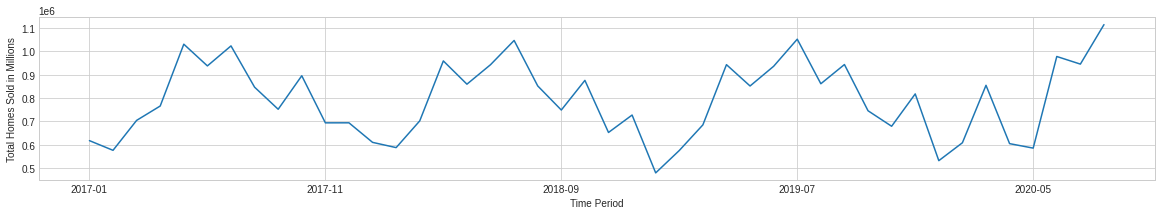

In [ ]:
#Using matplotlib to visualize the graph for total homes sold for all regions over the 2017-2020 time period by YYYY-MM
total_year['sum'].plot(figsize=(20,3))
plt.ylabel('Total Homes Sold in Millions')
plt.xlabel('Time Period')

In [ ]:
#Creating a pivot table to sum the inventory of homes for all counties, with an index of period_begin by YYYY-MM
inventory_year = df2.pivot_table(index='Year', columns='region_name', values='inventory', aggfunc='sum')

#Adding a column at the end showing the sum of inventory of homes for all given counties
inventory_year['sum'] = inventory_year.sum(numeric_only=True, axis=1)
inventory_year.head()

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO",sum
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01,1970.0,3091.0,NaN,3257.0,NaN,253.0,2386.0,1270.0,903.0,1764.0,563.0,12663.0,5008.0,4168.0,15880.0,1851.0,1511.0,421.0,NaN,NaN,231.0,1706.0,NaN,4297783.0,1802.0,1933.0,892.0,26445.0,13715.0,NaN,327.0,770.0,31323.0,6510.0,10171.0,362.0,4395.0,311.0,NaN,1796.0,...,15617.0,597.0,3635.0,236.0,2772.0,2280.0,2894.0,3689.0,2696.0,3039.0,NaN,134.0,134.0,13070.0,1416.0,NaN,1416.0,354.0,NaN,716.0,9978.0,5732.0,12258.0,NaN,2030.0,2275.0,427.0,101.0,1235.0,1084.0,NaN,1112.0,4721.0,9239.0,1329.0,9239.0,158.0,8805.0,NaN,11896292.0
2017-02,1157.0,2515.0,NaN,2563.0,NaN,245.0,1895.0,1055.0,518.0,1493.0,433.0,10271.0,4444.0,3250.0,12229.0,1451.0,1253.0,331.0,NaN,NaN,217.0,1588.0,NaN,3523654.0,1472.0,1603.0,515.0,21732.0,10988.0,NaN,342.0,634.0,26811.0,5590.0,8638.0,271.0,3727.0,951.0,NaN,1017.0,...,12632.0,317.0,3035.0,NaN,2263.0,1734.0,2230.0,2992.0,2034.0,2606.0,NaN,514.0,514.0,10760.0,1162.0,NaN,1162.0,284.0,NaN,967.0,7637.0,4831.0,9371.0,NaN,1333.0,1873.0,444.0,203.0,800.0,428.0,42.0,919.0,3595.0,7237.0,883.0,7237.0,76.0,7048.0,NaN,9729249.0
2017-03,1530.0,2562.0,NaN,2842.0,NaN,242.0,1890.0,1116.0,771.0,1189.0,159.0,10605.0,4750.0,3168.0,12093.0,1520.0,1306.0,373.0,NaN,NaN,113.0,1741.0,83.0,3641342.0,1448.0,805.0,680.0,22863.0,10817.0,NaN,460.0,468.0,28757.0,6032.0,9348.0,370.0,3810.0,313.0,NaN,1341.0,...,12879.0,653.0,2998.0,209.0,2287.0,1653.0,2165.0,3090.0,2015.0,2829.0,NaN,577.0,577.0,11176.0,1257.0,NaN,1257.0,279.0,NaN,683.0,7707.0,4985.0,9360.0,NaN,2091.0,1861.0,230.0,296.0,749.0,618.0,83.0,988.0,3633.0,7263.0,1259.0,7263.0,255.0,7141.0,NaN,10038242.0
2017-04,1570.0,2653.0,NaN,2862.0,NaN,176.0,1918.0,1256.0,202.0,1654.0,404.0,10834.0,5204.0,3174.0,12049.0,1599.0,635.0,444.0,NaN,NaN,111.0,1872.0,NaN,3767559.0,1132.0,1638.0,827.0,23422.0,11213.0,NaN,129.0,460.0,30784.0,6762.0,10346.0,394.0,3815.0,303.0,NaN,1360.0,...,13350.0,690.0,3046.0,151.0,2458.0,1719.0,2071.0,2992.0,2044.0,3033.0,NaN,655.0,655.0,11135.0,992.0,NaN,992.0,398.0,NaN,679.0,8239.0,4921.0,9958.0,NaN,2165.0,1841.0,352.0,176.0,540.0,421.0,NaN,1061.0,3831.0,7399.0,666.0,7399.0,176.0,7246.0,NaN,10358723.0

Text(0.5, 0, 'Time Period')

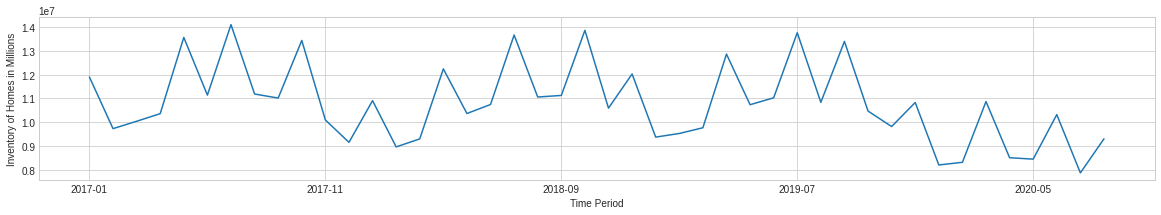

In [ ]:
#Using matplotlib to visualize the graph for inventory for all regions over the 2017-2020 time period by YYYY-MM
inventory_year['sum'].plot(figsize=(20,3))
plt.ylabel('Inventory of Homes in Millions')
plt.xlabel('Time Period')

In [ ]:
#Creating a pivot table to sum homes delisted for all counties, with an index of period_begin by YYYY-MM
deslisted_year = df2.pivot_table(index='Year', columns='region_name', values='homes_delisted', aggfunc='sum')

#Adding a column at the end showing the sum of homes delisted for all given counties
deslisted_year['sum'] = deslisted_year.sum(numeric_only=True, axis=1)
deslisted_year.head()

region_name,"Aberdeen, WA metro area","Abilene, TX metro area","Adair County, OK","Adams County, CO","Adams County, ID","Adams County, OH","Adams County, PA","Adams County, WI","Addison County, VT","Adrian, MI metro area","Aitkin County, MN","Akron, OH metro area","Alameda County, CA","Albany County, NY","Albany, NY metro area","Albany, OR metro area","Albemarle, NC metro area","Albert Lea, MN metro area","Albertville, AL metro area","Alexander County, NC","Alexandria, MN metro area","Alexandria, VA","Alice, TX metro area",All Redfin Metros,"Allegan County, MI","Allegany County, MD","Allegany County, NY","Allegheny County, PA","Allentown, PA metro area","Alma, MI metro area","Amador County, CA","Amsterdam, NY metro area","Anaheim, CA metro area","Anchorage Borough, AK","Anchorage, AK metro area","Anderson County, KY","Anderson County, SC","Anderson County, TN","Andrew County, MO","Androscoggin County, ME",...,"Wilmington, DE metro area","Wilmington, OH metro area","Wilson County, TN","Winchester, VA","Winchester, VA metro area","Windham County, CT","Windham County, VT","Windsor County, VT","Winnebago County, IL","Winnebago County, WI","Winnemucca, NV metro area","Winona County, MN","Winona, MN metro area","Winston-Salem, NC metro area","Wisconsin Rapids, WI metro area","Wolfe County, KY","Wood County, WI","Woodford County, KY","Woodruff County, AR","Wooster, OH metro area","Worcester County, MA","Worcester County, MD","Worcester, MA metro area","Worthington, MN metro area","Wright County, MN","Wyandotte County, KS","Wyoming County, NY","Yadkin County, NC","Yamhill County, OR","Yancey County, NC","Yellow Medicine County, MN","Yolo County, CA","York County, ME","York County, PA","York County, VA","York, PA metro area","Young County, TX","Youngstown, OH metro area","Yuma County, CO",sum
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01,23.0,46.0,NaN,36.0,NaN,5.0,18.0,13.0,16.0,29.0,9.0,207.0,116.0,63.0,250.0,13.0,24.0,7.0,NaN,NaN,2.0,22.0,NaN,55744.0,33.0,27.0,10.0,163.0,235.0,NaN,4.0,7.0,428.0,71.0,109.0,5.0,62.0,1.0,NaN,37.0,...,221.0,14.0,51.0,7.0,38.0,53.0,25.0,51.0,85.0,43.0,NaN,1.0,1.0,187.0,15.0,NaN,15.0,10.0,NaN,13.0,207.0,40.0,260.0,NaN,27.0,21.0,7.0,2.0,12.0,31.0,NaN,24.0,97.0,95.0,17.0,95.0,3.0,101.0,NaN,165250.0
2017-02,15.0,26.0,NaN,38.0,NaN,7.0,16.0,9.0,7.0,15.0,3.0,126.0,84.0,51.0,181.0,16.0,12.0,6.0,NaN,NaN,2.0,18.0,NaN,39894.0,19.0,17.0,7.0,161.0,141.0,NaN,6.0,7.0,310.0,54.0,73.0,6.0,37.0,4.0,NaN,9.0,...,124.0,4.0,44.0,NaN,27.0,28.0,18.0,21.0,39.0,13.0,NaN,6.0,6.0,98.0,6.0,NaN,6.0,5.0,NaN,10.0,134.0,32.0,162.0,NaN,10.0,20.0,9.0,4.0,13.0,3.0,1.0,16.0,36.0,48.0,10.0,48.0,1.0,75.0,NaN,117957.0
2017-03,13.0,27.0,NaN,20.0,NaN,4.0,23.0,8.0,5.0,9.0,1.0,128.0,89.0,42.0,138.0,16.0,14.0,7.0,NaN,NaN,1.0,32.0,6.0,40317.0,11.0,6.0,15.0,122.0,162.0,NaN,9.0,8.0,313.0,57.0,83.0,6.0,41.0,1.0,NaN,15.0,...,147.0,12.0,43.0,7.0,35.0,14.0,30.0,23.0,40.0,53.0,NaN,5.0,5.0,84.0,5.0,NaN,5.0,5.0,NaN,11.0,121.0,36.0,135.0,NaN,16.0,15.0,2.0,5.0,8.0,8.0,4.0,13.0,44.0,68.0,10.0,68.0,5.0,77.0,NaN,118894.0
2017-04,14.0,30.0,NaN,56.0,NaN,2.0,19.0,7.0,1.0,19.0,4.0,111.0,92.0,31.0,118.0,8.0,6.0,5.0,NaN,NaN,2.0,19.0,NaN,39162.0,13.0,19.0,21.0,298.0,152.0,NaN,2.0,6.0,325.0,48.0,75.0,9.0,32.0,1.0,NaN,12.0,...,134.0,5.0,31.0,2.0,27.0,19.0,28.0,20.0,22.0,24.0,NaN,7.0,7.0,82.0,8.0,NaN,8.0,7.0,NaN,11.0,128.0,30.0,147.0,NaN,21.0,8.0,5.0,5.0,8.0,2.0,NaN,17.0,48.0,54.0,8.0,54.0,4.0,82.0,NaN,115384.0
2017-05,17.0,40.0,NaN,40.0,NaN,2.0,13.0,7.0,15.0,23.0,9.0,164.0,142.0,50.0,209.0,16.0,11.0,9.0,NaN,NaN,NaN,45.0,NaN,54257.0,22.0,30.0,4.0,192.0,189.0,NaN,9.0,10.0,467.0,77.0,108.0,3.0,53.0,5.0,NaN,16.0,...,165.0,12.0,63.0,4.0,29.0,22.0,31.0,37.0,53.0,34.0,NaN,3.0,3.0,112.0,10.0,NaN,10.0,7.0,NaN,8.0,150.0,45.0,172.0,1.0,35.0,25.0,6.0,3.0,9.0,7.0,3.0,27.0,73.0,62.0,18.0,62.0,5.0,94.0,NaN,160015.0


Text(0.5, 0, 'Time Period')

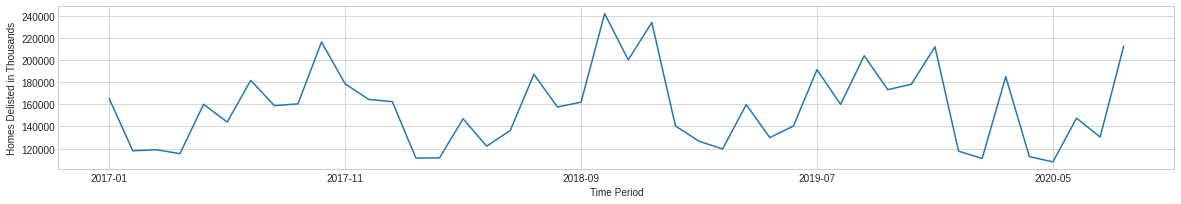

In [ ]:
#Using matplotlib to visualize the graph for homes delisted for all regions over the 2017-2020 time period by YYYY-MM
deslisted_year['sum'].plot(figsize=(20,3))
plt.ylabel('Homes Delisted in Thousands')
plt.xlabel('Time Period')